In [1]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_stations = pd.read_csv("q12020_level_up_data/citibike_stations.csv")

In [3]:
nyc_data = geopandas.read_file("q12020_level_up_data/NTA map.geojson")


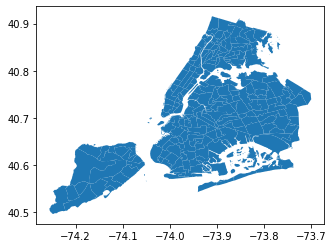

In [4]:
nyc_data.plot()

In [5]:
raw_stations= raw_stations.drop(["name","short_name","rental_methods","last_reported"], axis =1)

In [6]:
raw_stations['coordinates'] = raw_stations[['longitude', 'latitude']].values.tolist()

In [7]:
raw_stations['coordinates'] = raw_stations['coordinates'].apply(Point)
stations_geo = geopandas.GeoDataFrame(raw_stations,geometry='coordinates')

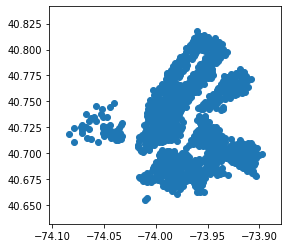

In [8]:
stations_geo.plot()

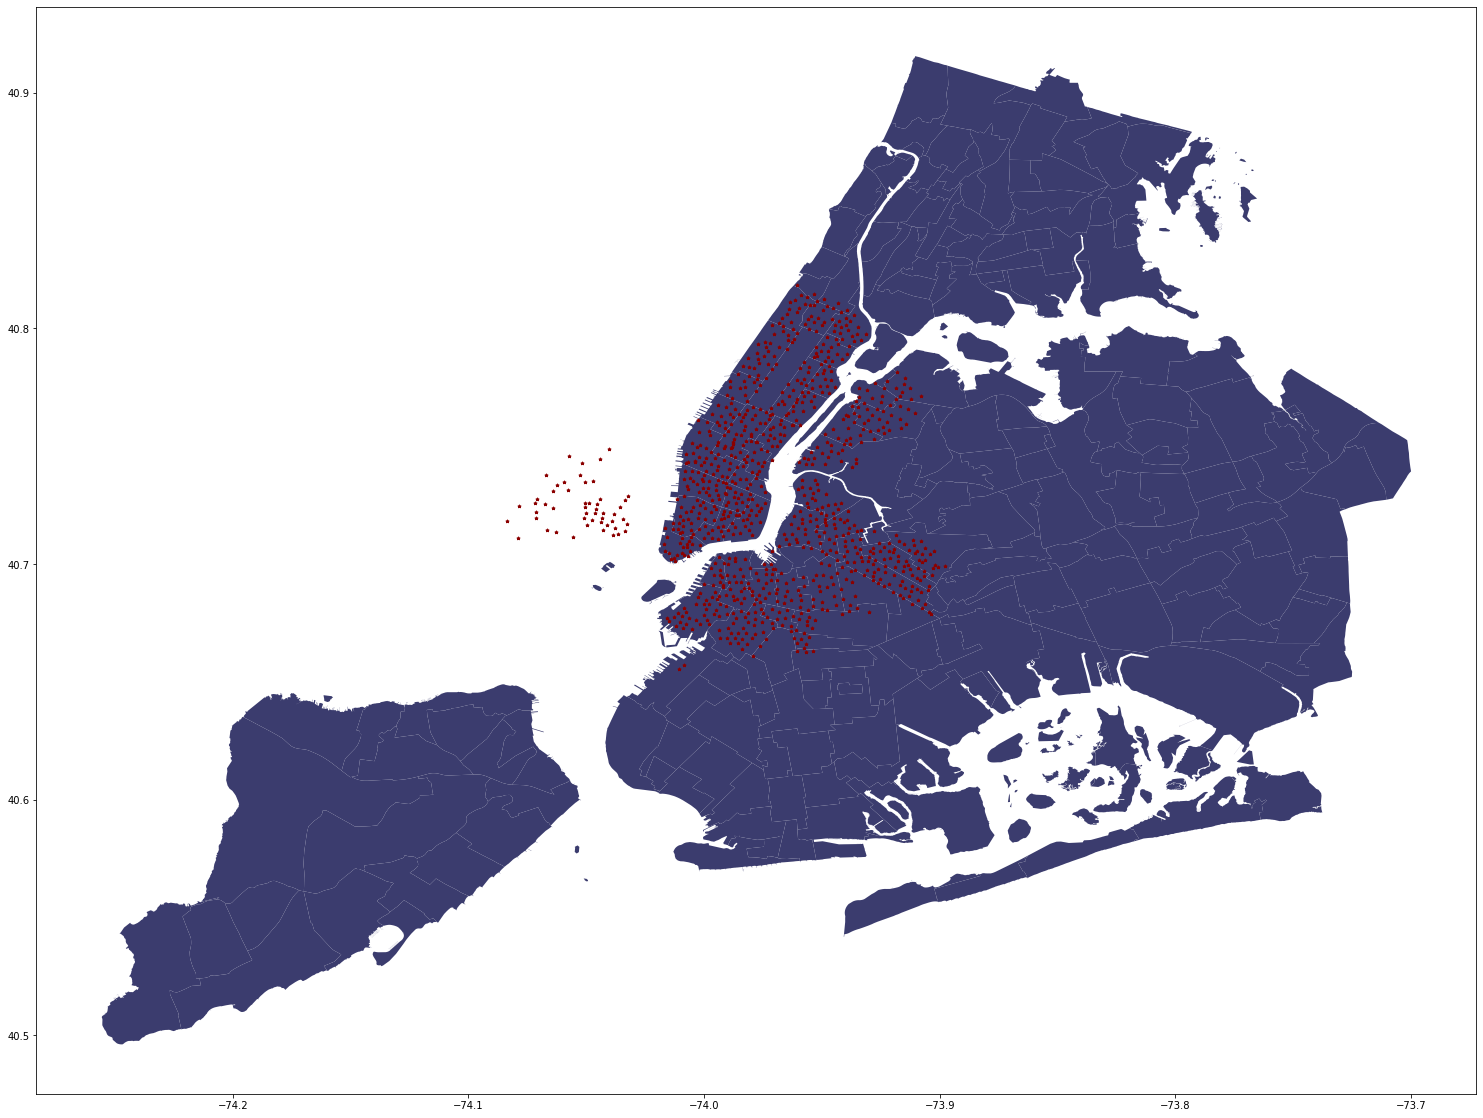

In [9]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = nyc_data.plot(ax=ax, color='#3B3C6E')
stations_geo.plot(ax=base, color='darkred', marker="*", markersize=10);

In [62]:
raw_trips = pd.read_csv("q12020_level_up_data/citibike_trips.csv")

In [13]:
nyc_trips=raw_trips.dropna(how = 'all').drop(["customer_plan"],axis=1)
nyc_trips["trip_date"] = pd.to_datetime(nyc_trips["starttime"]).dt.date

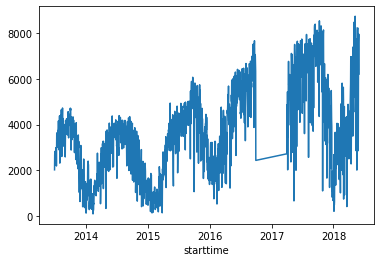

In [49]:
nyc_trips["starttime"].groupby(pd.to_datetime(nyc_trips["starttime"]).dt.date).size().plot()

In [21]:
nyc_trips.info()
nyt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6097518 entries, 0 to 6097517
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start_station_id         int64  
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bikeid                   float64
 12  usertype                 object 
 13  birth_year               float64
 14  gender                   object 
 15  trip_date                object 
dtypes: float64(7), int64(2), object(7)
memory usage: 790.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 5953955 entries, 2013-07-01 to 2018-05-31
Data columns (total 16 columns):
 #   Column        

In [40]:
nyt=nyc_trips[nyc_trips["start_station_id"]!=nyc_trips["end_station_id"]]

In [41]:
nyt[["start_station_id","end_station_id"]]

,start_station_id,end_station_id
0,509,442.0
1,280,254.0
2,335,540.0
3,146,387.0
4,529,352.0
...,...,...
6097513,531,502.0
6097514,495,309.0
6097515,435,3463.0
6097516,466,494.0


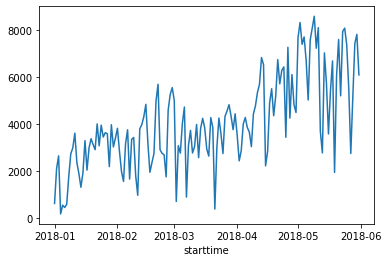

In [61]:
temp= nyt[pd.to_datetime(nyt['starttime']).dt.year>2017]
temp["starttime"].groupby(pd.to_datetime(temp["starttime"]).dt.date).size().plot()

In [56]:
temp.count()

tripduration               615738
starttime                  615738
stoptime                   615738
start_station_id           615738
start_station_name         615738
start_station_latitude     615738
start_station_longitude    615738
end_station_id             615738
end_station_name           615738
end_station_latitude       615738
end_station_longitude      615738
bikeid                     615738
usertype                   615738
birth_year                 615738
gender                     615738
trip_date                  615738
dtype: int64